# Basic Gauss-Seidel Method Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plot of the function

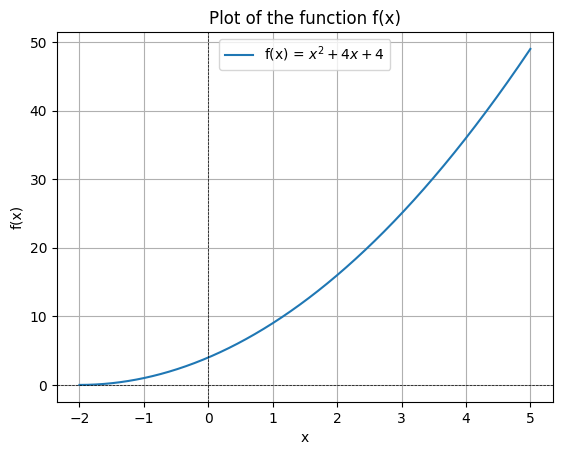

In [2]:
# f(x) = x^3 - 6*x^2 + 9*x - 4

# def f(x):
#     return x**3 - 6*x**2 + 9*x - 4

def f(x):
    return x**2+ 4*x + 4


x = np.linspace(-2,5, 1000)
y = f(x)

plt.plot(x, y, label='f(x) = $x^2 + 4x + 4$')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title('Plot of the function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

## Recurrsive Relation

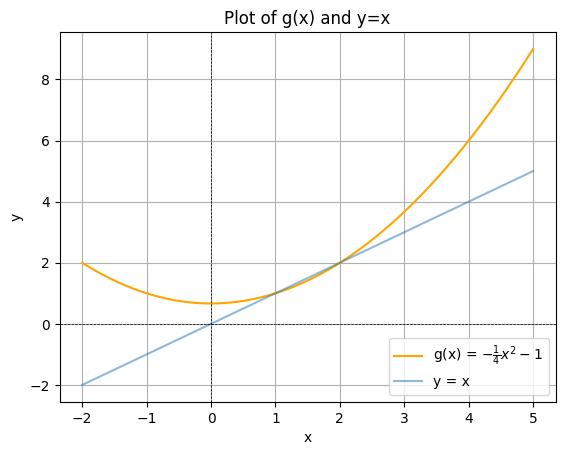

In [12]:
# in the gauss-seidel method we rearrange the equations to isolate each variable on the left side.
# For example, for this system, x = -1/4*x^2 -1 will be the equation for x.  

# g(x) = -1/4*x^2 -1
def g(x): 
    return (x**2+2)/3
# y = x
y_identity = x


#plot grpahs of g(x) and y=x
plt.plot(x, g(x), label='g(x) = $-\\frac{1}{4}x^2 - 1$', color='orange')
plt.plot(x, y_identity, label='y = x', alpha=0.5)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title('Plot of g(x) and y=x')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## lets find the solutions for the this equations using Gauss-Seidel Method

Exact solution found.
Converged to 2.0 after 0 iterations.
Solution is correct
0.0


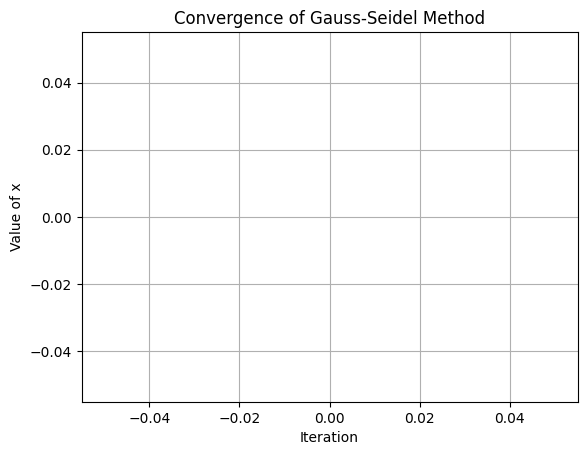

In [8]:
# error tolerance
error  = 0


# initial guess
x_n  = 2

# iteration parameters
iter = 0
max_iter = 100

#iteration loop result
results_iter = {}

# recurent relation for this equation is x_n+1 = g(x_n)
# def gx(x): 
#     return (-1/9)*x**3 + (2/3)*x**2 + (4/9)

def f(x):
    return x**2 -3*x + 2

def gx(x): 
    return (x**2+2)/3

# Gauss-Seidel Iteration

fxold = 0

while iter < max_iter:
    x_new = gx(x_n)
    if x_new == x_n:
        print("Exact solution found.")
        break
    results_iter[iter] = x_new
    
    if abs(x_new - x_n) < error:
        break
    x_n = x_new
    iter += 1
    print(f"Iteration {iter}: x = {x_new}")
    
    if f(x_new) > 10 and f(x_new)> fxold:
        print("Divergence detected. Stopping iteration.")
        break
    
print(f"Converged to {x_new} after {iter} iterations.")


# verify that converged value actually is a root of f(x)
if abs(f(x_new)) <= 0.01:
    print("Solution is correct")
    print(f(x_new))
else:
    print("The value that converged into ",f(x_new), "is not equal to 0.")
    

# Plotting the convergence
iterations = list(results_iter.keys())
values = list(results_iter.values())

plt.plot(iterations, values, marker='o')
plt.title('Convergence of Gauss-Seidel Method')
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.grid()
plt.show()
    

    
    
    




## how initial guesses affects the convergence of the method

Initial Guesses =  [-2, -1, 4, 4.5, 5, 6]
Gradients =  [-4.0, -1.6666666666666665, 0.0, -0.75, -1.666666666666666, -4.0]
[4.0, 4.0]
[1.222222222222222, 1.2374638012498094, 1.2547723357954434, 1.2745712053749763, 1.2974010161120995, 1.3239607669024478, 1.355166529744774, 1.3922362993314645, 1.4368143724159501, 1.4911558431961942, 1.5584023618226233, 1.64299373593709, 1.7512696132591965, 1.8922915015017907, 2.0787497285897176, 2.327167597231025, 2.6545546214666107, 3.063801880942459, 3.5068605746005863, 3.8512006544517527, 3.9856052368207955, 3.9998621919428388, 3.999999987339584]
[4.0]
[3.8194444444444446, 3.9789204794429187, 3.999704809942566, 3.999999941911412]
[3.2222222222222214, 3.648986434994665, 3.9226650475504323, 3.9960642608367962, 3.9999896800786887]
[0.4444444444444444, 0.5663770766651425, 0.6381126471141422, 0.6870327610174923, 0.7230883329446492, 0.7510076463270883, 0.7733885800344911, 0.7917991715148358, 0.8072511446317013, 0.82043085491859, 0.8318225721031627, 0.84177897

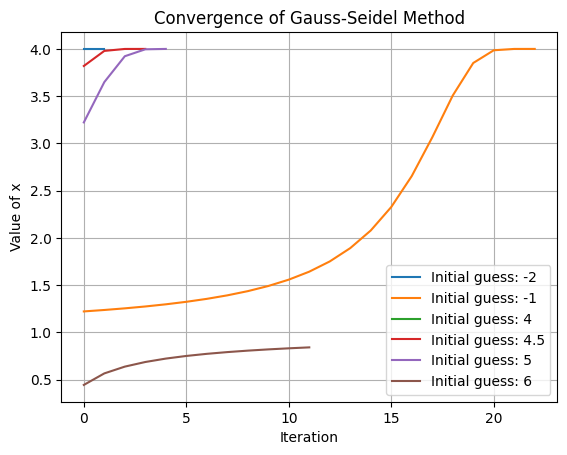

In [62]:
# Lets how see the effect of different initial guesses on convergence
initial_guesses = [-2,-1,4, 4.5, 5,6]
print("Initial Guesses = ", initial_guesses)

# derivative at each initial guess
def df(x):
    return (-1/3)*x**2 + (4/3)*x

# calc gradient at each initial guess
grad = [df(x) for x in initial_guesses]

print("Gradients = ",grad)

# lets plot gradient vs iter number to approach
 
# error tolerance
error  = 0.01

# iteration parameters
iter = 0
max_iter = 100

#iteration loop result
results = []


# recurrent relation for this equation is x_n+1 = g(x_n)
def gx(x): 
    return (-1/9)*x**3 + (2/3)*x**2 + (4/9)

# gauss-Seidel iteration
iter_num = []
for x0 in initial_guesses:
    x_n = float(x0)
    results_iter = {}
    iter = 0

    while iter < max_iter:
        x_new = gx(x_n)
        results_iter[iter] = x_new
        
        if x_new == x_n:
            break
    
        if abs(x_new - x_n) < error:
            iter+=1
            break
        
        x_n = x_new
        iter += 1
    
    results.append(results_iter)
    iter_num.append(iter)


for res in results:
    print(list(res.values()))

for results_iter in results:
    # Plotting the convergence
    iterations = list(results_iter.keys())
    values = list(results_iter.values())
    plt.plot(iterations, values)

plt.title('Convergence of Gauss-Seidel Method')
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.legend([f'Initial guess: {ig}' for ig in initial_guesses])
plt.grid()
plt.show()






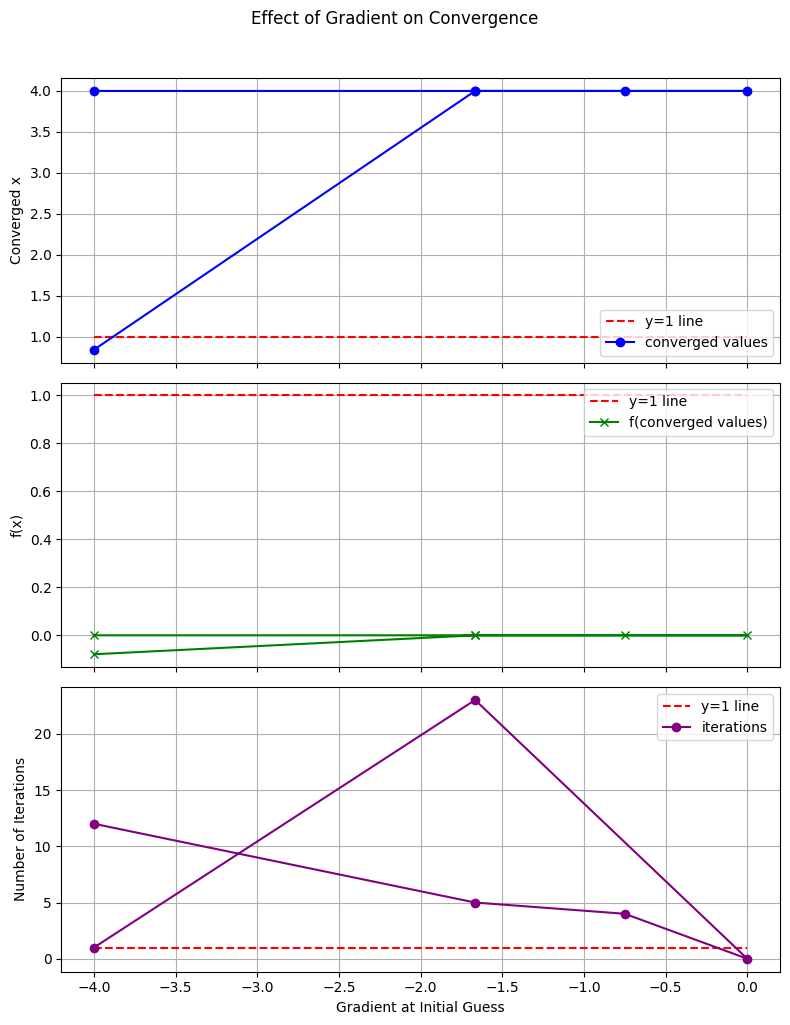

In [63]:
#converged value list
converged_values = [list(res.values())[-1] if (bool(res) is True) else None for res in results]


# final f(converged_values)
f_value = [f(val) for val in converged_values]

#plotting y = 1 line, horizontal line at y=1
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

axes[0].hlines(1, xmin=min(grad), xmax=max(grad), colors='r', linestyles='dashed', label='y=1 line')
axes[0].plot(grad, converged_values, marker='o', color='blue', label='converged values')
axes[0].set_ylabel('Converged x')
axes[0].grid(True)
axes[0].legend(loc='best')

axes[1].hlines(1, xmin=min(grad), xmax=max(grad), colors='r', linestyles='dashed', label='y=1 line')
axes[1].plot(grad, f_value, marker='x', color='green', label='f(converged values)')
axes[1].set_ylabel('f(x)')
axes[1].grid(True)
axes[1].legend(loc='best')

axes[2].hlines(1, xmin=min(grad), xmax=max(grad), colors='r', linestyles='dashed', label='y=1 line')
axes[2].plot(grad, iter_num, marker='o', color='purple', label='iterations')
axes[2].set_xlabel('Gradient at Initial Guess')
axes[2].set_ylabel('Number of Iterations')
axes[2].grid(True)
axes[2].legend(loc='best')

fig.suptitle('Effect of Gradient on Convergence', y=1.02)
plt.tight_layout()
plt.show()